# Part 2 -- Training the Model

In [2]:
import pandas as pd
diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = diamonds.drop(columns=['Unnamed: 0'])
diamonds.head()
diamonds.describe()

carat         price     cut__Fair     cut__Good    cut__Ideal  \
count  53917.000000  53917.000000  53917.000000  53917.000000  53917.000000   
mean       0.797687   3930.910474      0.029842      0.090918      0.399633   
std        0.473777   3987.215003      0.170153      0.287494      0.489827   
min        0.200000    326.000000      0.000000      0.000000      0.000000   
25%        0.400000    949.000000      0.000000      0.000000      0.000000   
50%        0.700000   2401.000000      0.000000      0.000000      0.000000   
75%        1.040000   5323.000000      0.000000      0.000000      1.000000   
max        5.010000  18823.000000      1.000000      1.000000      1.000000   

       cut__Premium  cut__Very Good      color__D      color__E      color__F  \
count  53917.000000    53917.000000  53917.000000  53917.000000  53917.000000   
mean       0.255559        0.224048      0.125638      0.181668      0.176902   
std        0.436179        0.416958      0.331444      0.385574      0.381589   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        0.000000        0.000000      0.000000      0.000000      0.000000   
50%        0.000000        0.000000      0.000000      0.000000      0.000000   
75%        1.000000        0.000000      0.000000      0.000000      0.000000   
max        1.000000        1.000000      1.000000      1.000000      1.000000   

       ...      color__I      color__J   clarity__I1   clarity__IF  \
count  ...  53917.000000  53917.000000  53917.000000  53917.000000   
mean   ...      0.100543      0.052080      0.013688      0.033199   
std    ...      0.300726      0.222191      0.116192      0.179158   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

       clarity__SI1  clarity__SI2  clarity__VS1  clarity__VS2  clarity__VVS1  \
count  53917.000000  53917.000000  53917.000000  53917.000000   53917.000000   
mean       0.242280      0.170336      0.151492      0.227275       0.067771   
std        0.428467      0.375931      0.358531      0.419076       0.251355   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       clarity__VVS2  
count   53917.000000  
mean        0.093959  
std         0.291775  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 22 columns]

## Trial1. Train w/ just 1 feature (Carat)

Score:  0.9187743277836133


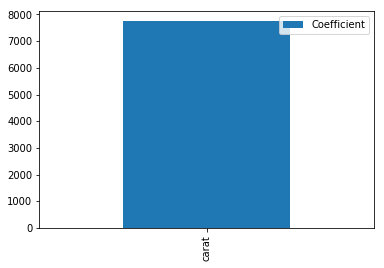

Mean squared error: 708335.77
Variance score: 0.92
       carat
14650   1.31
52416   0.71
          actual  predict         diff       diff%
3    7904.568690     5916  1988.568690   25.157207
16   3250.898130     2513   737.898130   22.698285
6    3173.336954     1999  1174.336954   37.006374
10  10231.403970     9005  1226.403970   11.986664
2    7284.079282     6817   467.079282    6.412331
14   9533.353386     9405   128.353386    1.346361
4    -394.477141      552  -946.477141  239.932063
             price
count    20.000000
mean   3520.950000
std    3029.780233
min     552.000000
25%    1219.500000
50%    1906.500000
75%    6059.500000
max    9405.000000


In [6]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from myutils import run_linear2
%matplotlib inline    

diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
data = diamonds['carat'].to_frame()
target = diamonds['price'].to_frame()
run_linear2(data, target)


Just carat alone gives you 92% accuracy !

## Trial2. Train with all features

Now train w/ all the columns (onehot encoding the categorical/ordinaral columns Color, Cut, Clarity) and dropping x,y,z,depth for now


Score:  0.9760420391678098


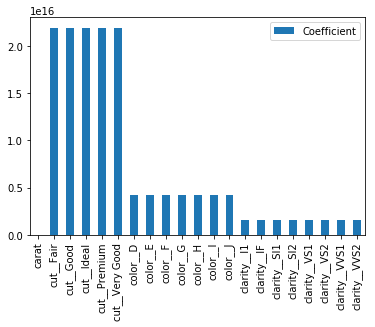

Mean squared error: 208927.55
Variance score: 0.98
       carat  cut__Fair  cut__Good  cut__Ideal  cut__Premium  cut__Very Good  \
14650   1.31          0          0           0             0               1   
52416   0.71          0          0           1             0               0   

       color__D  color__E  color__F  color__G  ...  color__I  color__J  \
14650         0         0         0         0  ...         1         0   
52416         0         0         0         1  ...         0         0   

       clarity__I1  clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  \
14650            0            0             0             1             0   
52416            0            0             1             0             0   

       clarity__VS2  clarity__VVS1  clarity__VVS2  
14650             0              0              0  
52416             0              0              0  

[2 rows x 21 columns]
    actual  predict   diff      diff%
3   6312.0     5916  396.0   6.27376

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from myutils import run_linear2 

%matplotlib inline

diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
data = diamonds.drop(columns=['Unnamed: 0', 'price'])
target = diamonds['price'].to_frame()
run_linear2(data, target)


Mean squared error: 208927.55  208k not so great ?  well 98% accuracy is good!

## Trial3. Use Standardization/Normalization of numeric (carat)

Try normalizing using builtin flag.  I would think ordinal encoding of color would be better than onehot -- but not sounding so from scikit docs.  Otherwise jump to diff models like Ensembles


Score:  0.9760102523271434


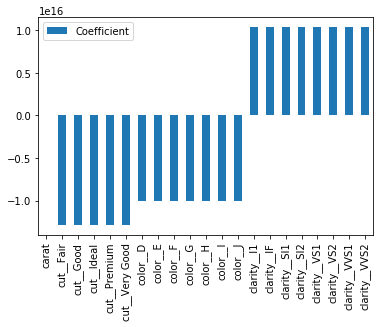

Mean squared error: 209204.75
Variance score: 0.98
       carat  cut__Fair  cut__Good  cut__Ideal  cut__Premium  cut__Very Good  \
14650   1.31          0          0           0             0               1   
52416   0.71          0          0           1             0               0   

       color__D  color__E  color__F  color__G  ...  color__I  color__J  \
14650         0         0         0         0  ...         1         0   
52416         0         0         0         1  ...         0         0   

       clarity__I1  clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  \
14650            0            0             0             1             0   
52416            0            0             1             0             0   

       clarity__VS2  clarity__VVS1  clarity__VVS2  
14650             0              0              0  
52416             0              0              0  

[2 rows x 21 columns]
14650    5916
52416    2513
48600    1999
20757    9005
Name: price, dtype

In [68]:
# try built-in normalize
run_linear(diamonds, norm=True)

## Trial4.  The Super model: XGBoost -- will it be the savior ?

I hate to jump to XGB -- but it tends to work lets take a look ?

Score:  0.8265374103133327


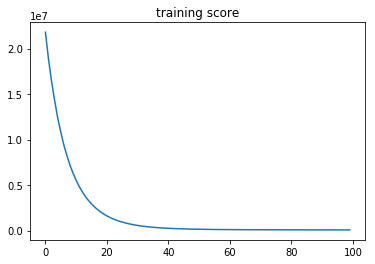

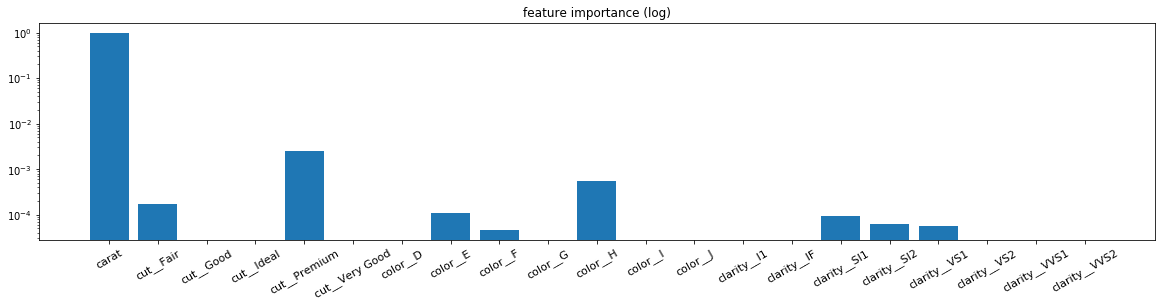

0.8265374103133327

In [133]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

def run_emsemble(diamonds, norm=True, lr=0.1, ne=100, md=1, g=True):
    X, y = diamonds, diamonds.price
    X = X.drop(columns=['price','Unnamed: 0'])
    X_train, X_test = X[:20], X[20:]
    y_train, y_test = y[:20], y[20:]
    est = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr,
        max_depth=md, random_state=8, loss='ls').fit(X_train, y_train)
    score = est.score(X_test, y_test)
    print('Score: ',score)
    mean_squared_error(y_test, est.predict(X_test))    

    if (g):
        plt.plot(est.train_score_)
        plt.title('training score')
        plt.show()

        index = np.arange(len(est.feature_importances_))
        plt.figure(figsize=(20,4))
        plt.bar(index, est.feature_importances_)
        plt.title('feature importance (log)')
        plt.xticks(index, X_test.columns, fontsize=11, rotation=30)
        plt.yscale('log')
        plt.show()

    return score
run_emsemble(diamonds, True, 0.1, 100, 1)



82.6% Hmmm not better than linear regression w/ just 1 feature !

## Trial 5.  How about a classic Random Forest ?

In [122]:
from sklearn.ensemble import RandomForestRegressor

X, y = diamonds, diamonds.price
X = X.drop(columns=['price','Unnamed: 0'])
X_train, X_test = X[:20], X[20:]
y_train, y_test = y[:20], y[20:]

regr = RandomForestRegressor(max_depth=2, random_state=8, n_estimators=100)
regr.fit(X_train, y_train)  

print('Score: ', regr.score(X_test, y_test))
print(regr.feature_importances_)
print(regr.predict(X_test))


Score:  0.8153170087115502
[9.47011513e-01 0.00000000e+00 8.68676043e-03 2.80128681e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.10714367e-03 0.00000000e+00 5.60437131e-04 7.44731248e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.61054401e-03
 0.00000000e+00 0.00000000e+00 6.26600293e-03 0.00000000e+00
 0.00000000e+00]
[1549.20837484 1502.39131942 1931.13988461 ... 1626.17203371 1639.72903371
 1816.02617307]


81.5% Blah this sucks

## Trial 6.  Back to fine tuning the XGB

But can I get it any higher than Multi-LinearRegression 98% ?

Vary the learning rate
Score:  0.6148354918351837
Score:  0.8254283842102725
Score:  0.8265374103133327
Score:  0.8336066571801146
Score:  0.8321623054308322
Score:  0.7396221361864788
Vary the estimators
Score:  0.6309643355952674
Score:  0.8260213171946986
Score:  0.8265374103133327
Score:  0.8301984851271415
Score:  0.8357797265072995
Score:  0.8413856333445588
Vary the depth
Score:  0.8265374103133327
Score:  0.8577243705106666
Score:  0.8546810017110337
Score:  0.8117456590091041
Score:  0.7796839388068351


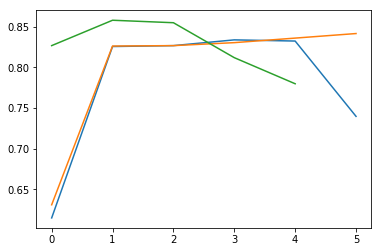

In [142]:
print('Vary the learning rate')
scores = []
for i in [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]:
    scores.append(run_emsemble(diamonds, True, i, 100, 1, False))
plt.plot(scores)

print('Vary the estimators')
scores = []
for i in [10, 50, 100, 150, 300, 1000]:
    scores.append(run_emsemble(diamonds, True, 0.1, i, 1, False))
plt.plot(scores)

print('Vary the depth')
scores = []
for i in [1,2,3,4,5]:
    scores.append(run_emsemble(diamonds, True, 0.1, 100, i, False))
plt.plot(scores)


My Analysis is that Linear Regression works pretty well and I dont know how to tune XGB to get a higher score.
For now let me move to additional data.

[Diamond-Analysis-3](Diamond-Analysis-3.ipynb)
